Train on 569 samples
Epoch 1/3
569/569 [==============================] - 0s 249us/sample - loss: 14.4749 - acc: 0.0035
Epoch 2/3
569/569 [==============================] - 0s 65us/sample - loss: 14.4824 - acc: 0.0070
Epoch 3/3
569/569 [==============================] - 0s 190us/sample - loss: 14.5163 - acc: 0.0334
0


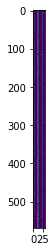

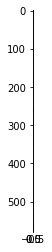

In [0]:
import pandas as pd #leitura
import tensorflow as tf
from sklearn.model_selection import train_test_split #modelo de aprendizado para teste
from sklearn.preprocessing import LabelEncoder #labelencoder para substituir título por números
from keras.utils import np_utils #np_utils.to_categorical(classe) para melhorar a visualizacao --> em vez de ver os elementos como 0,1,2 --> 001,010,100;
from keras.models import Sequential, Model
from keras.layers import Dense, Input #camadas densas -> estão ligadas a toda a rede posterior

entrada = pd.read_csv('entradas-breast.csv') #leitura
saida = pd.read_csv('saidas-breast.csv') #leitura
atributos = entrada[:].values
classe = saida[:].values

#lab = LabelEncoder()
#atributos = lab.fit_transform(atributos)
#atributos = np_utils.to_categorical(atributos) bad input shape

atributos = tf.keras.utils.normalize(atributos,axis=1) #dot after values in array
classe = tf.keras.utils.normalize(classe,axis=1) #dot after values in array

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu)) #default activation function, 128 neurons
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax)) #output layer

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(atributos, classe, epochs=3)

val_loss, val_acc = model.evaluate(atributos,classe) 
val_loss #var to evaluate loss

import numpy as np 
print(np.argmax(classe[0])) #reader

import matplotlib.pyplot as plt
plt.imshow(atributos)
plt.show()
plt.imshow(classe)
plt.show()